In [1]:
!pip install requests pandas nltk gtts

In [53]:
# Importing liberies
import requests  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from nltk.sentiment import SentimentIntensityAnalyzer  
from gtts import gTTS 
import IPython.display as ipd  
import os 
import nltk 
import warnings
warnings.filterwarnings("ignore")

In [5]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Getting API key
API_KEY = "aca1c572cc1c4319b9a54d1ff63cee36"  

In [9]:
def get_news(company_name):
    """
    Fetches the latest 10 news articles related to the given company.
    """
    url = f"https://newsapi.org/v2/everything?q={company_name}&language=en&sortBy=publishedAt&apiKey={API_KEY}"
    response = requests.get(url)
    data = response.json() 

    if "articles" in data:  
        return data["articles"] 
        return []  

In [11]:
# Using Tesla
company_name = "Tesla"  

In [13]:
news_articles = get_news(company_name)

In [15]:
if not news_articles:
    print("No news found for", company_name)
else:
    print(f"News articles fetched successfully for {company_name}!")

News articles fetched successfully for Tesla!


In [17]:
if news_articles:
    print("\nFirst 3 articles preview:")
    for i, article in enumerate(news_articles[:3], 1):
        print(f"{i}. {article['title']}")


First 3 articles preview:
1. Whether we like it or not...: EAM Jaishankar reacts to tariffs and sanctions
2. FBI says latest Tesla attack has 'some of the hallmarks of terrorism'
3. Former Tesla Autopilot Head Shares Ultimate Digital Hygiene Tips And Tricks — Andrej Karpathy's 'No Brainer' Guide To Safe And Private Computing


In [19]:
def analyze_sentiment(news_articles):
    """
    Analyzes the sentiment of news headlines using VADER.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_results = []
    pos_count, neg_count, neu_count = 0, 0, 0

    for article in news_articles:
        title = article["title"]
        sentiment_score = sia.polarity_scores(title)["compound"]

        if sentiment_score > 0:
            sentiment = "Positive"
            pos_count += 1
        elif sentiment_score < 0:
            sentiment = "Negative"
            neg_count += 1
        else:
            sentiment = "Neutral"
            neu_count += 1

        sentiment_results.append({"Title": title, "Sentiment": sentiment, "Link": article["url"]})

    return sentiment_results, pos_count, neg_count, neu_count

In [49]:
def plot_sentiment_graph(pos_count, neg_count, neu_count, company_name):
    """
    Plots a bar chart for sentiment distribution.
    """
    sentiments = ["Positive", "Negative", "Neutral"]
    counts = [pos_count, neg_count, neu_count]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiments, y=counts, palette=["green", "red", "gray"])
    plt.xlabel("Sentiment Category")
    plt.ylabel("Number of Articles")
    plt.title(f"Sentiment Analysis for {company_name}")
    plt.show()


Sentiment Analysis Summary:
Positive: 3, Negative: 5, Neutral: 2


C:\Users\DELL\AppData\Local\Temp\ipykernel_17552\2395060040.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments, y=counts, palette=["green", "red", "gray"])


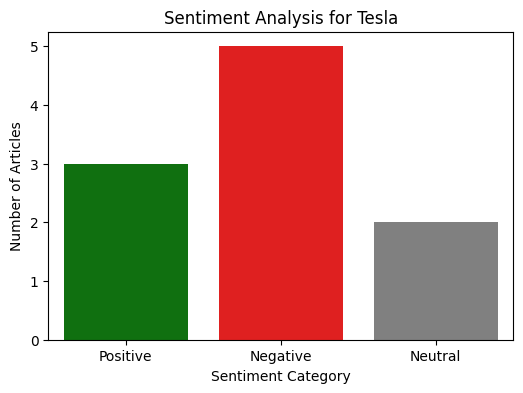

In [51]:
if news_articles:
    sentiment_data, pos_count, neg_count, neu_count = analyze_sentiment(news_articles[:10]) # Using 10 articles
    print("\nSentiment Analysis Summary:")
    print(f"Positive: {pos_count}, Negative: {neg_count}, Neutral: {neu_count}")
    plot_sentiment_graph(pos_count, neg_count, neu_count, company_name)

In [33]:
if news_articles:
    df = pd.DataFrame(sentiment_data)
    print("\nSentiment Analysis for first 3 articles:")
    print(df.head(3))


Sentiment Analysis for first 3 articles:
                                               Title Sentiment  \
0  Whether we like it or not...: EAM Jaishankar r...  Positive   
1  FBI says latest Tesla attack has 'some of the ...  Negative   
2  Former Tesla Autopilot Head Shares Ultimate Di...  Positive   

                                                Link  
0  https://economictimes.indiatimes.com/news/indi...  
1  https://www.abc.net.au/news/2025-03-19/fbi-say...  
2              https://biztoc.com/x/385358fce53bf97e  


In [35]:
if news_articles:
    summary_text = f"Aaj {company_name} ke baare mein {pos_count} sakaratmak, {neg_count} nakaratmak, aur {neu_count} madhyasth samachar hain."
    tts = gTTS(text=summary_text, lang='hi')
    tts.save("summary.mp3")

In [37]:
if news_articles:
    print("\nPlaying Hindi Audio Summary...")
    ipd.display(ipd.Audio("summary.mp3"))


Playing Hindi Audio Summary...


In [39]:
if os.path.exists("summary.mp3"):
    os.remove("summary.mp3")